## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             ConfusionMatrixDisplay, RocCurveDisplay)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## Load Cleaned Data

In [2]:
df = pd.read_csv("../data/bank_cleaned.csv")
data = df.copy()

## Separate Features and Target

In [3]:
X = data.drop(columns=['deposit'])
y = data['deposit']

## Split Dataset and Standardize Features

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Initialize and Train SVM Model

In [5]:
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Make Predictions

In [6]:
y_pred = svm.predict(X_test_scaled)
y_proba = svm.predict_proba(X_test_scaled)[:, 1]  # needed for ROC-AUC

## Evaluate Model Performance

In [7]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"AUC-ROC: {roc_auc:.3f}")

Accuracy: 0.838
Precision: 0.820
Recall: 0.844
F1-score: 0.832
AUC-ROC: 0.911


## Confusion Matrix

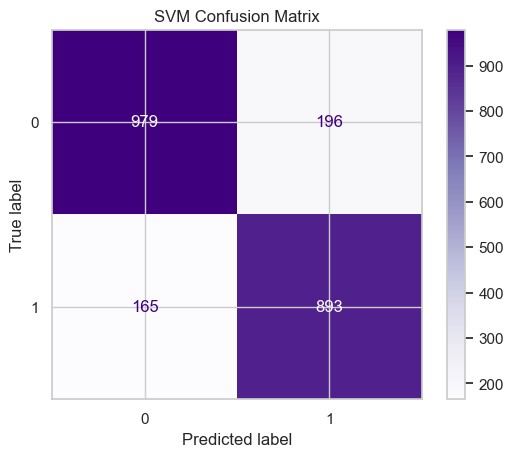

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap='Purples')
plt.title("SVM Confusion Matrix")
plt.show()

## ROC Curve

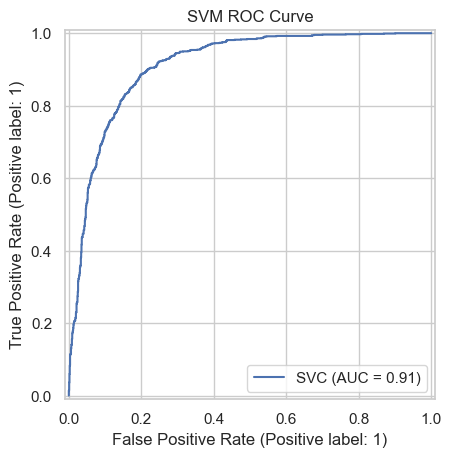

In [9]:
roc_disp = RocCurveDisplay.from_estimator(svm, X_test_scaled, y_test)
plt.title("SVM ROC Curve")
plt.show()

## Cross-Validation

In [10]:
cv_scores = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
print(f"5-Fold CV Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

5-Fold CV Accuracy: 0.805 ± 0.030
